# Problema 53 y 54
## 53)
Tiremos $N=10000$ partículas de manera randómica en un box 3-D de lado $L=1$ con $10 \times 10 \times 10$ celdas de lado $\Delta = 0.1$, y ordenémoslas de forma secuencial según un índice que indique en qué celda se encuentra. Es decir, ordenaremos según $p_x$ creciente, $p_y$ creciente y $p_z$ creciente, siendo $\vec p \in \mathbb{Z}$ los índices de cada celda según $(x,y,z)$. Veamos:

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA

L = 1 #Lado del box
c = 10 #subdivisiones
n = 10000 #cant de partículas

#Tiramos las partículas y las guardamos en un DataFrame, donde a cada una le asignaremos un número de celda
#(Hay 10x10x10 = 1000 celdas)

np.random.seed(0) #Para poder replicar resultados
pos = np.random.uniform(0,L,(n,3))
df = pd.DataFrame(pos,columns=['x','y','z']) #Guardamos (x,y,z)

p = np.arange(0,n)
df['ID'] = p #Esta es la columna que indica en qué celda se encuentra
df

,x,y,z,ID
0,0.548814,0.715189,0.602763,0
1,0.544883,0.423655,0.645894,1
2,0.437587,0.891773,0.963663,2
3,0.383442,0.791725,0.528895,3
4,0.568045,0.925597,0.071036,4
...,...,...,...,...
9995,0.744256,0.833002,0.177207,9995
9996,0.463218,0.581561,0.390984,9996
9997,0.763993,0.886611,0.535190,9997
9998,0.820328,0.622359,0.531140,9998


In [66]:
#Creamos las columnas con los lugares en el box de cada celda:

px = np.arange(0,n) #para guardar integers

df['px'] = px
df['py'] = px
df['pz'] = px

In [67]:
#Veamos en qué celda está c/u:

for k in range(n): #Dada 1 partícula
    for i in range(c): 
        if i/c <= df['x'][k] < (i+1)/c: #En qué x está
            df.loc[k,'px'] = i
            for j in range(c):
                if j/c <= df['y'][k] < (j+1)/c: #En qué y está
                    df.loc[k,'py'] = j
                    for l in range(c):
                        if l/c <= df['z'][k] < (l+1)/c: #En qué z está
                            df.loc[k,'pz'] = l
                        
df

,x,y,z,ID,px,py,pz
0,0.548814,0.715189,0.602763,0,5,7,6
1,0.544883,0.423655,0.645894,1,5,4,6
2,0.437587,0.891773,0.963663,2,4,8,9
3,0.383442,0.791725,0.528895,3,3,7,5
4,0.568045,0.925597,0.071036,4,5,9,0
...,...,...,...,...,...,...,...
9995,0.744256,0.833002,0.177207,9995,7,8,1
9996,0.463218,0.581561,0.390984,9996,4,5,3
9997,0.763993,0.886611,0.535190,9997,7,8,5
9998,0.820328,0.622359,0.531140,9998,8,6,5


In [68]:
#Ahora que tenemos lo que queremos, ordenémoslos:

df.sort_values(['px','py','pz'],axis=0,ascending=True,inplace=True)

In [69]:
#Ordenemos para tener al ID adelante:

cols = df.columns.tolist()
cols = ['ID','x','y','z','px','py','pz']
df = df[cols]
df.reset_index(drop=True,inplace=True)
df

,ID,x,y,z,px,py,pz
0,2895,0.051109,0.014323,0.009938,0,0,0
1,6093,0.012744,0.083504,0.085411,0,0,0
2,6894,0.008240,0.062820,0.017741,0,0,0
3,7898,0.074266,0.085869,0.044141,0,0,0
4,7928,0.018127,0.067056,0.057628,0,0,0
...,...,...,...,...,...,...,...
9995,7926,0.913730,0.919717,0.969072,9,9,9
9996,8200,0.942519,0.942736,0.964198,9,9,9
9997,8683,0.966037,0.984070,0.948510,9,9,9
9998,9446,0.909621,0.977912,0.964272,9,9,9


¡Y listo! Tenemos ordenadas a nuestras partículas según la celda a la que correspondan, de manera secuencial en X, Y y Z, sin importar el orden en el que obtuve sus posiciones.

## 54)
Utilizando el método de ordenar secuencialmente las partículas según la celda con la ayuda de un DataFrame, repitamos el procedimiento del ejercicio anterior pero ahora para $N=32$. Entonces, elegida una partícula, podríamos ponernos a comparar la distancia entre cada otro miembro y quedarnos con la mayor. <br>
Pero esto no vale si pensamos que el box es periódico: si no tenemos en cuenta la periodicidad, esta distancia física dentro del box original puede ser falsa en el sistema periódico. <br>
Luego, comenzamos buscando desde la celda más lejana: si hay partículas que pertenecen a esta celda calculo la distancia entre la partícula elegida y las partículas se encuentran en la celda analizada, y me quedo con la mayor. <br>
Generemos nuestros datos de 32 partículas:

In [73]:
#Copiamos y pegamos para obtener un df de 32 partículas:

n = 32
np.random.seed(0) #Para poder replicar resultados
pos = np.random.uniform(0,L,(n,3))
df = pd.DataFrame(pos,columns=['x','y','z']) #Guardamos (x,y,z)
p = np.arange(0,n)
df['ID'] = p #Esta es la columna que indica en qué celda se encuentra
px = np.arange(0,n) #para guardar integers
df['px'] = px
df['py'] = px
df['pz'] = px
#Veamos en qué celda está c/u:

for k in range(n): #Dada 1 partícula
    for i in range(c): 
        if i/c <= df['x'][k] < (i+1)/c: #En qué x está
            df.loc[k,'px'] = i
            for j in range(c):
                if j/c <= df['y'][k] < (j+1)/c: #En qué y está
                    df.loc[k,'py'] = j
                    for l in range(c):
                        if l/c <= df['z'][k] < (l+1)/c: #En qué z está
                            df.loc[k,'pz'] = l
df.sort_values(['px','py','pz'],axis=0,ascending=True,inplace=True)
#Ordenemos para tener al ID adelante:

cols = df.columns.tolist()
cols = ['ID','x','y','z','px','py','pz']
df = df[cols]
df.reset_index(drop=True,inplace=True)
df

,ID,x,y,z,px,py,pz
0,5,0.087129,0.020218,0.832620,0,0,8
1,25,0.039188,0.282807,0.120197,0,2,1
2,29,0.093941,0.575946,0.929296,0,5,9
3,23,0.096098,0.976459,0.468651,0,9,4
4,21,0.138183,0.196582,0.368725,1,1,3
5,20,0.158970,0.110375,0.656330,1,1,6
6,8,0.118274,0.639921,0.143353,1,6,1
7,26,0.296140,0.118728,0.317983,2,1,3
8,18,0.208877,0.161310,0.653108,2,1,6
9,19,0.253292,0.466311,0.244426,2,4,2


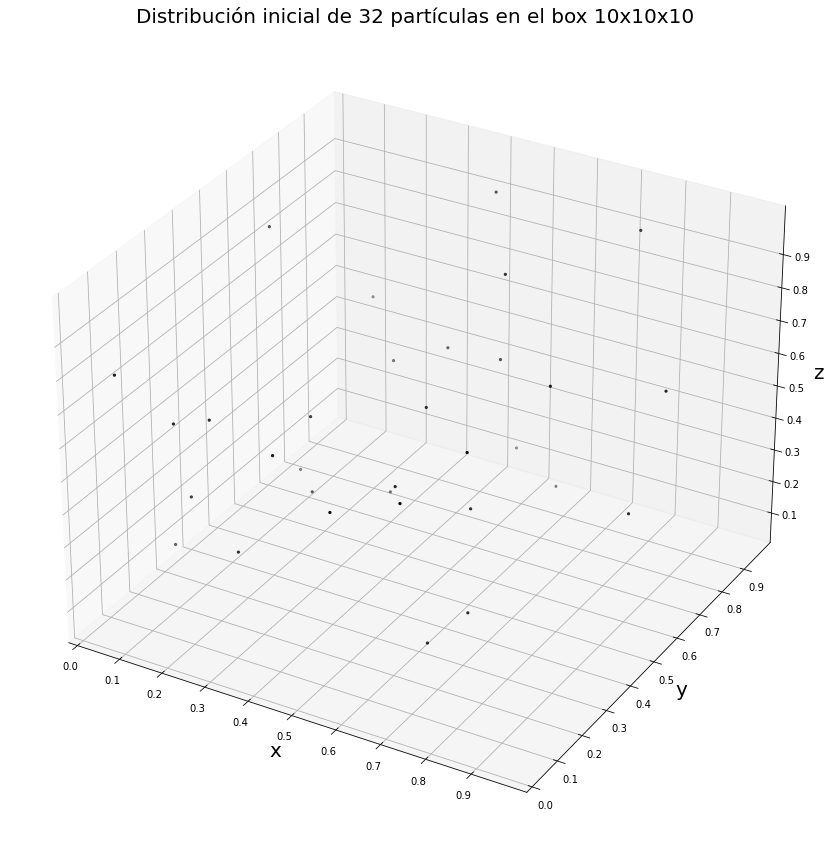

In [112]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')    
graf = ax.scatter3D(pos[:,0],pos[:,1], pos[:,2],s=5,c='k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(np.arange(0,10)/10)
plt.yticks(np.arange(0,10)/10)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title(f'Distribución inicial de {n} partículas en el box {c}x{c}x{c}',fontsize=20)
plt.grid(True)
ax.set_zticks(np.arange(0,10)/10)
ax.set_zlabel('z',fontsize=20);

Una vez generados los datos, como las partículas están ordenadas secuencialmente según celda, pidamos la de **ID** $= 0$

In [91]:
#Como no están ordenadas por "intento", veamos el vecino más lejano de la partícula con ID = 0

a = df.get(df['ID'] == 0) #Lo que se encuentra adentro del ".get" es un booleano (!)
a

,ID,x,y,z,px,py,pz
20,0,0.548814,0.715189,0.602763,5,7,6


Estos son los datos de la partícula seleccionada. Como el box es de $10 \times 10 \times 10$ subdivisiones y consideramos periodicidad, las celdas más alejadas serán las que se encuentra a 5 de distancia en cada dirección.

En este caso, como estamos parados sobre la celda $(5,7,6)$, quiero investigar los miembros (si es que hay) de la celda $(0,2,1)$:

In [94]:
#Y, como el box es periódico, tengo que buscar los miembros más "lejanos" en las celdas que se encuentra a 5 lugares en cada dirección
#de donde estoy:

px_m = int((a['px']+5)%10)
py_m = int((a['py']+5)%10)
pz_m = int((a['pz']+5)%10)

vec = df.get(df['px'] == px_m)
vec = vec.get(vec['py'] == py_m)
vec = vec.get(vec['pz'] == pz_m)
vec

,ID,x,y,z,px,py,pz
1,25,0.039188,0.282807,0.120197,0,2,1


Tuvimos suerte y resulta que en la celda más alejada de la original existe una única partícula. Esto implica que si o si es el miembro más alejado. Calculemos la distancia entre estas 2 partículas:

In [117]:
ID1 = int(a['ID'])
ID2 = int(vec['ID'])

x1 = float(a['x'])
y1 = float(a['y'])
z1 = float(a['z'])

x2 = float(vec['x'])
y2 = float(vec['y'])
z2 = float(vec['z'])

d = LA.norm((x1-x2,y1-y2,z1-z2))
print(f'La distancia entre los miembros con ID {ID1} y {ID2} es d = {d}')

La distancia entre los miembros con ID 0 y 25 es d = 0.8243443697346913


Para comprobar, sabemos que la distancia máxima posible en esta configuración (periódica) es la mitad de la diagonal del box. <br>
### <center> $d_{max} = \frac{1}{2} \sqrt{1^2 + 1^2 + 1^2} = \frac{\sqrt{3}}{2} \approx 0.866$ </center>
¡Que es cercano a nuestro resultado! Por lo tanto, tenemos una separación casi máxima entre partículas.

In [118]:
print(f'd_max teórica posible es = {np.sqrt(3)/2}')

d_max teórica posible es = 0.8660254037844386
